In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import ComplementNB, GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gensim
from tensorflow.keras.preprocessing.text import Tokenizer
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
import seaborn as sns
import joblib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('final.csv')

In [3]:
df.head()

,Unnamed: 0,Ratings,Full_review,word_count,cleaned_length
0,0,4.0,affordable beast pro incredible performance av...,85,52
1,2,5.0,best laptop price segment battery quite bad pe...,82,45
2,3,4.0,this laptop beast steal money the combo rtx i ...,94,50
3,4,5.0,the laptop masterpiece stunnig design premium ...,63,41
4,5,5.0,wanted decent gaming laptop good spec then fou...,98,55


In [4]:
df.dropna(inplace = True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17581 entries, 0 to 17602
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      17581 non-null  int64  
 1   Ratings         17581 non-null  float64
 2   Full_review     17581 non-null  object 
 3   word_count      17581 non-null  int64  
 4   cleaned_length  17581 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 824.1+ KB


## Naive Bayes

In [5]:
tfidf = TfidfVectorizer()

In [6]:
x = df['Full_review']
y = df['Ratings']

In [7]:
x = tfidf.fit_transform(x)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.2)

In [9]:
model1 = ComplementNB()
model1.fit(x_train, y_train)

ComplementNB()

In [10]:
y_pred = model1.predict(x_test)

In [11]:
confusion_matrix(y_test, y_pred)

array([[  95,   21,    9,   26,  499],
       [  21,    8,    4,    2,  108],
       [  36,   11,    2,    9,  224],
       [  70,   23,    7,   52,  678],
       [ 143,   57,   17,   75, 1320]], dtype=int64)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.26      0.15      0.19       650
         2.0       0.07      0.06      0.06       143
         3.0       0.05      0.01      0.01       282
         4.0       0.32      0.06      0.10       830
         5.0       0.47      0.82      0.59      1612

    accuracy                           0.42      3517
   macro avg       0.23      0.22      0.19      3517
weighted avg       0.34      0.42      0.34      3517



**Score is not good lets try oversampling on data**

In [14]:
os = RandomOverSampler()
X_os, y_os = os.fit_sample(x, y)

In [15]:
X_os.shape, y_os.shape, x.shape, y.shape

((41110, 16674), (41110,), (17581, 16674), (17581,))

In [29]:
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(X_os,
                                                   y_os,
                                                   test_size = 0.2)

In [30]:
model2 = ComplementNB()
model2.fit(x_train_os, y_train_os)

ComplementNB()

In [31]:
y_pred2 = model2.predict(x_test_os)

In [32]:
print(classification_report(y_test_os, y_pred2))

              precision    recall  f1-score   support

         1.0       0.57      0.53      0.55      1664
         2.0       0.59      0.79      0.68      1641
         3.0       0.60      0.65      0.63      1655
         4.0       0.42      0.48      0.45      1620
         5.0       0.37      0.19      0.25      1642

    accuracy                           0.53      8222
   macro avg       0.51      0.53      0.51      8222
weighted avg       0.51      0.53      0.51      8222



In [33]:
model4 = MultinomialNB()
model4.fit(x_train_os, y_train_os)

MultinomialNB()

In [34]:
y_pred4 = model4.predict(x_test_os)

In [35]:
print(classification_report(y_test_os, y_pred4))

              precision    recall  f1-score   support

         1.0       0.51      0.57      0.53      1664
         2.0       0.62      0.76      0.68      1641
         3.0       0.60      0.61      0.61      1655
         4.0       0.40      0.44      0.42      1620
         5.0       0.35      0.19      0.25      1642

    accuracy                           0.51      8222
   macro avg       0.50      0.51      0.50      8222
weighted avg       0.50      0.51      0.50      8222



In [36]:
model5 = RandomForestClassifier()
model5.fit(x_train_os, y_train_os)

RandomForestClassifier()

In [37]:
y_pred5 = model5.predict(x_test_os)

In [38]:
print(classification_report(y_test_os, y_pred5))

              precision    recall  f1-score   support

         1.0       0.88      0.83      0.85      1664
         2.0       0.95      0.99      0.97      1641
         3.0       0.95      0.97      0.96      1655
         4.0       0.83      0.74      0.78      1620
         5.0       0.68      0.75      0.71      1642

    accuracy                           0.86      8222
   macro avg       0.86      0.86      0.86      8222
weighted avg       0.86      0.86      0.86      8222



In [49]:
model6 = XGBClassifier()
model6.fit(x_train_os, y_train_os)

C:\Users\mussa\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
y_pred6 = model6.predict(x_test_os)

In [51]:
print(classification_report(y_test_os, y_pred6))

              precision    recall  f1-score   support

         1.0       0.68      0.57      0.62      1664
         2.0       0.86      0.89      0.88      1641
         3.0       0.77      0.73      0.75      1655
         4.0       0.47      0.66      0.55      1620
         5.0       0.41      0.32      0.36      1642

    accuracy                           0.63      8222
   macro avg       0.64      0.63      0.63      8222
weighted avg       0.64      0.63      0.63      8222



## Hyperparameter tuning

In [78]:
params = {'bootstrap': [True, False],
 'max_depth': [20,40,50 ],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,600]}

In [70]:
cv = KFold(n_splits = 5, random_state = 0)

C:\Users\mussa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [79]:
rfc_grid = GridSearchCV(RandomForestClassifier(),
                       param_grid = params,
                       cv = cv,
                       verbose = True,
                       n_jobs = -1)

In [80]:
rfc_grid.fit(x_train_os, y_train_os)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 78.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 128.2min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 202.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [20, 40, 50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 600]},
             verbose=True)

In [82]:
y_pred7 = rfc_grid.predict(x_test_os)

In [83]:
print(classification_report(y_test_os, y_pred7))

              precision    recall  f1-score   support

         1.0       0.83      0.69      0.75      1664
         2.0       0.98      0.84      0.91      1641
         3.0       0.98      0.81      0.88      1655
         4.0       0.50      0.81      0.62      1620
         5.0       0.66      0.56      0.61      1642

    accuracy                           0.74      8222
   macro avg       0.79      0.74      0.75      8222
weighted avg       0.79      0.74      0.75      8222



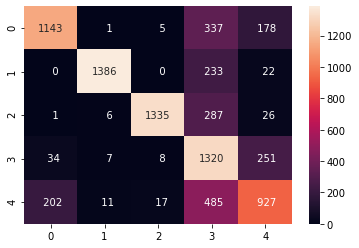

In [87]:
sns.heatmap(confusion_matrix(y_test_os, y_pred7),
           annot = True,
           fmt = '4g');

In [89]:
joblib.dump(rfc_grid, 'Ratings-predictor.pkl')

['Ratings-predictor.pkl']